In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
## Importing district demographic and financial data
data = pd.read_csv('C:/Users/viks9/OneDrive/Documents/district_data.csv')
financials = pd.read_csv('C:/Users/viks9/OneDrive/Documents/financials.csv')
data = pd.merge(data, financials, on='Agency Name', how='left')
data = data.rename(columns= {'Total Current Expenditures - Salary (Z32) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2016-17': '% Salary'})

C:\Users\viks9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Agency Name,State Name [District] Latest available year_x,State Abbr [District] Latest available year,Agency ID - NCES Assigned [District] Latest available year,Supervisory Union (ID) Number [District] 2018-19,Total Number Operational Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,County Name [District] 2018-19,Agency Type [District] 2018-19,Urban-centric Locale [District] 2018-19,...,Mailing City [District] 2018-19,Mailing State Abbr [District] 2018-19,Mailing ZIP [District] 2018-19,Mailing ZIP4 [District] 2018-19,Phone Number [District] 2018-19,State Name [District] Latest available year_y,Total General Revenue (TOTALREV) [District Finance] 2016-17,Total Expenditures (TOTALEXP) [District Finance] 2016-17,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17,% Salary
0,21ST CENTURY CHARTER SCH OF GARY,Indiana,IN,1800046,,1,1.0,Marion County,7-Independent Charter District,13-City: Small,...,Indianapolis,IN,46202,,3175361027,Indiana,9342000.0,8637000.0,10520.0,58.3
1,21ST CENTURY CYBER CS,Pennsylvania,PA,4200091,,1,1.0,Chester County,7-Independent Charter District,21-Suburb: Large,...,Downingtown,PA,19335,,4848755400,Pennsylvania,12848000.0,12528000.0,13369.0,46.8
2,21ST CENTURY PREPARATORY SCHOOL AGENCY,Wisconsin,WI,5500045,,1,1.0,Racine County,7-Independent Charter District,13-City: Small,...,Racine,WI,53404,,2625980026,Wisconsin,NaN,NaN,0.0,NaN
3,A CENTER FOR CREATIVE EDUCATION (79457),Arizona,AZ,400328,,1,1.0,Yavapai County,7-Independent Charter District,32-Town: Distant,...,COTTONWOOD,AZ,86326,2509,9286343288,Arizona,492000.0,495000.0,7688.0,55.3
4,A E R O SPEC EDUC COOP,Illinois,IL,1700024,,7,7.0,Cook County,9-Specialized public school district,21-Suburb: Large,...,Burbank,IL,60459,1200,7084963330,Illinois,31656000.0,33042000.0,NaN,51.3


In [4]:
data.columns

Index(['Agency Name', 'State Name [District] Latest available year_x',
       'State Abbr [District] Latest available year',
       'Agency ID - NCES Assigned [District] Latest available year',
       'Supervisory Union (ID) Number [District] 2018-19',
       'Total Number Operational Schools [Public School] 2018-19',
       'Total Number of Public Schools [Public School] 2018-19',
       'County Name [District] 2018-19', 'Agency Type [District] 2018-19',
       'Urban-centric Locale [District] 2018-19',
       'Lowest Grade Offered [District] 2018-19',
       'Highest Grade Offered [District] 2018-19',
       'Total Students All Grades (Excludes AE) [District] 2018-19',
       'Full-Time Equivalent (FTE) Teachers [District] 2018-19',
       'Pupil/Teacher Ratio [District] 2018-19',
       'Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2018-19',
       'Reduced-price Lunch Eligible Students [Public School] 2018-19',
       'Free and Reduced Lunch Student

In [5]:
## Dropping columns that are not needed
data = data.drop(columns = ['Agency ID - NCES Assigned [District] Latest available year',
                            'Supervisory Union (ID) Number [District] 2018-19',
                            'Location Address 2 [District] 2018-19',
                            'Location Address 3 [District] 2018-19',
                            'Mailing Address 2 [District] 2018-19',
                            'Mailing Address 3 [District] 2018-19',
                            'Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2018-19',
                            'Reduced-price Lunch Eligible Students [Public School] 2018-19',
                            'State Name [District] Latest available year_y',
                            'Total General Revenue (TOTALREV) [District Finance] 2016-17',
                            'Total Expenditures (TOTALEXP) [District Finance] 2016-17',
                            'Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17',
                           ]
                )

In [6]:
## Only selecting schools that have schools in relevant grades (PreK-5th)
relevant_grades = ['Kindergarten', 'Prekindergarten','1st Grade', '4th Grade','5th Grade', '3rd Grade', '2nd Grade']
under_fifth = data[data['Lowest Grade Offered [District] 2018-19'].isin(relevant_grades)]

In [7]:
under_fifth.describe()

,Total Number Operational Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,Total Students All Grades (Excludes AE) [District] 2018-19,Full-Time Equivalent (FTE) Teachers [District] 2018-19,Pupil/Teacher Ratio [District] 2018-19,Free and Reduced Lunch Students [Public School] 2018-19,Location ZIP [District] 2018-19,Mailing ZIP [District] 2018-19,Phone Number [District] 2018-19,% Salary
count,17440.000000,17192.000000,17383.000000,17412.000000,16833.000000,15560.000000,17440.000000,17440.000000,1.744000e+04,16056.000000
mean,6.032053,6.164030,3132.495024,196.089950,15.198162,1681.495823,52604.335952,52597.174713,5.875645e+09,54.622770
std,16.070147,16.308039,10909.886917,634.415389,45.617295,7185.952536,28943.252320,28940.929914,2.300762e+09,11.166303
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1002.000000,1002.000000,2.012278e+09,0.000000
25%,1.000000,1.000000,326.000000,23.117500,11.770000,147.000000,29788.500000,29741.250000,4.062510e+09,51.500000
50%,3.000000,3.000000,854.000000,60.805000,14.200000,400.000000,55075.500000,55070.500000,6.036744e+09,56.300000
75%,5.000000,6.000000,2439.000000,159.740000,16.890000,1096.250000,75791.250000,75789.250000,8.012693e+09,60.300000
max,785.000000,785.000000,495255.000000,21981.260000,5207.690000,391289.000000,99929.000000,99929.000000,9.899842e+09,254.200000


In [8]:
## Deleting rows that have null values in rows that will be used for our analysis
under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'].notna()]
under_fifth = under_fifth[under_fifth['Total Students All Grades (Excludes AE) [District] 2018-19'] > 0]
under_fifth = under_fifth[under_fifth['% Salary'].notna()]

In [9]:
## finding pupil/student upper limit and lower limits
pupil_iqr = 16.89 - 11.77
pupil_upper_limit = (pupil_iqr * 1.5) + 16.89
pupil_lower_limit = 11.77 - (pupil_iqr * 1.5)
print(pupil_upper_limit)
print(pupil_lower_limit)

under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'] <= 25]
under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'] >= 4]

## only focusing on regulal public schools
under_fifth = under_fifth[under_fifth['Agency Type [District] 2018-19'] == '1-Regular local school district that is NOT a component of a supervisory union']

24.57
4.089999999999998


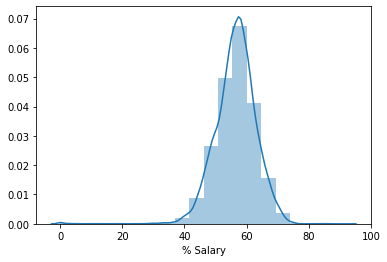

In [10]:
sns.distplot(under_fifth['% Salary'], bins = 20)

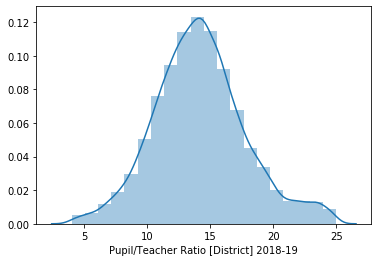

In [11]:
sns.distplot(under_fifth['Pupil/Teacher Ratio [District] 2018-19'], bins = 20)

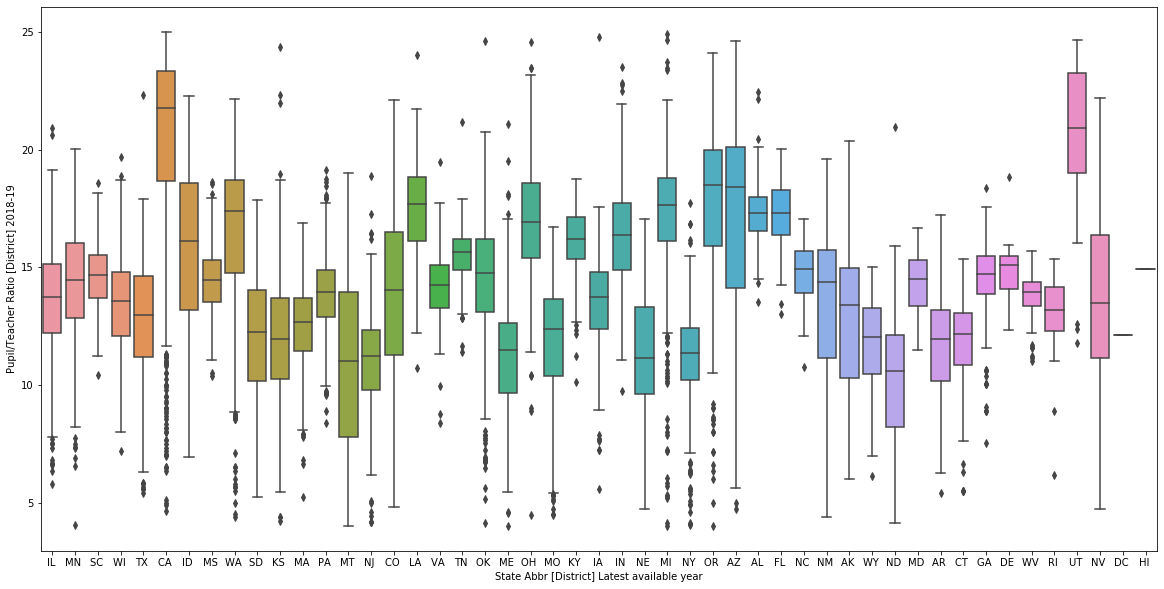

In [12]:
## Distribution of class size by state
plt.figure(figsize=(20,10))
sns.boxplot(x=under_fifth['State Abbr [District] Latest available year'], y=under_fifth['Pupil/Teacher Ratio [District] 2018-19'])

In [13]:
under_fifth.groupby('State Abbr [District] Latest available year')['Pupil/Teacher Ratio [District] 2018-19'].describe()

,count,mean,std,min,25%,50%,75%,max
State Abbr [District] Latest available year,,,,,,,,
AK,48.0,13.146042,3.145657,6.00,10.2775,13.380,14.9800,20.36
AL,216.0,17.321250,1.263023,13.52,16.5250,17.310,18.0000,22.45
AR,281.0,11.721423,2.339766,5.41,10.1500,11.960,13.1900,17.21
AZ,185.0,17.150108,4.192490,4.71,14.1300,18.400,20.1000,24.61
CA,847.0,20.270283,4.300794,4.63,18.6650,21.760,23.3600,25.00
CO,176.0,13.747614,3.561652,4.80,11.2675,14.045,16.5000,22.12
CT,243.0,11.774156,1.838944,5.48,10.8500,12.150,13.0700,15.34
DC,1.0,12.120000,NaN,12.12,12.1200,12.120,12.1200,12.12
DE,20.0,14.889000,1.346422,12.35,14.0700,15.085,15.4625,18.85


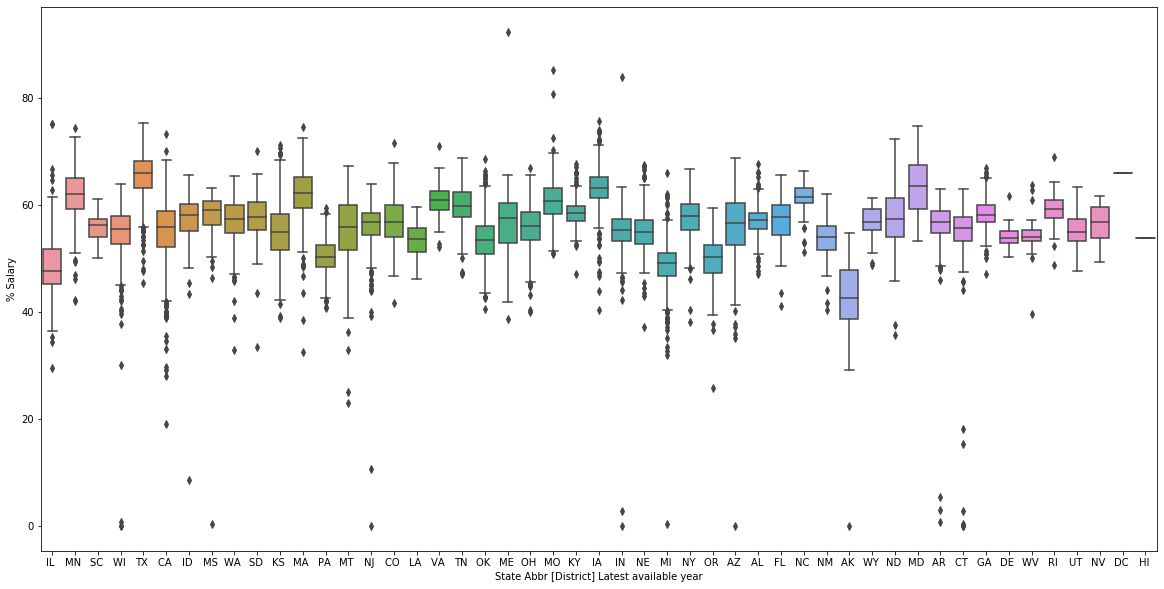

In [14]:
## Distribution of % of Expendatures spent on Salaries by state
plt.figure(figsize=(20,10))
sns.boxplot(x=under_fifth['State Abbr [District] Latest available year'], y=under_fifth['% Salary'])

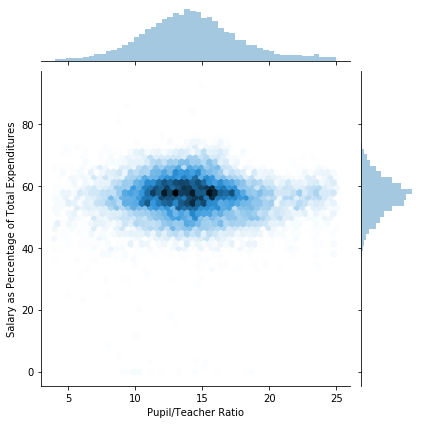

In [15]:
fig = sns.jointplot(under_fifth['Pupil/Teacher Ratio [District] 2018-19'], under_fifth['% Salary'], kind='hex' )
fig.set_axis_labels('Pupil/Teacher Ratio', 'Salary as Percentage of Total Expenditures')

In [16]:
## Identifying the 75% of Salary Expendatures by state
top_75_salary = pd.DataFrame(under_fifth.groupby('State Abbr [District] Latest available year')['% Salary'].describe()['75%'])

##Identifying the bottom 25% of pupil/teacher ratio by state
bottom_25_class_size = pd.DataFrame(under_fifth.groupby('State Abbr [District] Latest available year')['Pupil/Teacher Ratio [District] 2018-19'].describe()['25%'])

## Combining Data
limits = pd.merge(top_75_salary, bottom_25_class_size, on= 'State Abbr [District] Latest available year', how='left'  )
limits= limits.rename(columns={'75%': 'Top Percentile Salary', '25%':'Bottom Percentile Techer/Student'})
limits

,Top Percentile Salary,Bottom Percentile Techer/Student
State Abbr [District] Latest available year,,
AK,47.825,10.2775
AL,58.600,16.5250
AR,58.900,10.1500
AZ,60.400,14.1300
CA,58.900,18.6650
CO,60.050,11.2675
CT,57.800,10.8500
DC,66.100,12.1200
DE,55.125,14.0700


In [17]:
compare = pd.merge(under_fifth, limits, on='State Abbr [District] Latest available year', how='left')

In [18]:
compare.head()

,Agency Name,State Name [District] Latest available year_x,State Abbr [District] Latest available year,Total Number Operational Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,County Name [District] 2018-19,Agency Type [District] 2018-19,Urban-centric Locale [District] 2018-19,Lowest Grade Offered [District] 2018-19,Highest Grade Offered [District] 2018-19,...,Location ZIP4 [District] 2018-19,Mailing Address 1 [District] 2018-19,Mailing City [District] 2018-19,Mailing State Abbr [District] 2018-19,Mailing ZIP [District] 2018-19,Mailing ZIP4 [District] 2018-19,Phone Number [District] 2018-19,% Salary,Top Percentile Salary,Bottom Percentile Techer/Student
0,A-C CENTRAL CUSD 262,Illinois,IL,3,3.0,Cass County,1-Regular local school district that is NOT a ...,42-Rural: Distant,Prekindergarten,12th Grade,...,260,PO Box 260,Ashland,IL,62612,260,2174768112,49.0,51.8,12.1875
1,A.C.G.C. PUBLIC SCHOOL DISTRICT,Minnesota,MN,3,3.0,Meeker County,1-Regular local school district that is NOT a ...,42-Rural: Distant,Prekindergarten,12th Grade,...,5003,27250 MN HWY 4,GROVE CITY,MN,56243,5003,3202444712,62.6,65.0,12.8500
2,ABBEVILLE 60,South Carolina,SC,9,9.0,Abbeville County,1-Regular local school district that is NOT a ...,42-Rural: Distant,Prekindergarten,12th Grade,...,,400 Greenville Street,Abbeville,SC,29620,,8643665427,57.6,57.5,13.6900
3,ABBOTSFORD SCHOOL DISTRICT,Wisconsin,WI,2,2.0,Clark County,1-Regular local school district that is NOT a ...,41-Rural: Fringe,Prekindergarten,12th Grade,...,,510 W Hemlock St,Abbotsford,WI,54405,,7152236715,47.2,58.0,12.0700
4,ABBOTT ISD,Texas,TX,1,2.0,Hill County,1-Regular local school district that is NOT a ...,42-Rural: Distant,Prekindergarten,12th Grade,...,226,P O BOX 226,ABBOTT,TX,76621,226,2545823011,62.8,68.2,11.1650


In [19]:
## Excluding values that have a high pupil/teacher ratio's...not as much room to increase class sizes
first = compare[compare['Pupil/Teacher Ratio [District] 2018-19'] < compare['Bottom Percentile Techer/Student']]

In [20]:
## Excluding values that have a high % of Expendatures on Salary...room to decrease expenses
second = first[first['% Salary'] > first['Top Percentile Salary']]

In [21]:
non_rural = second[second['Urban-centric Locale [District] 2018-19'] != '42-Rural: Distant']
non_rural = non_rural[non_rural['Urban-centric Locale [District] 2018-19'] != '43-Rural: Remote']

In [22]:
non_rural.head()

,Agency Name,State Name [District] Latest available year_x,State Abbr [District] Latest available year,Total Number Operational Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,County Name [District] 2018-19,Agency Type [District] 2018-19,Urban-centric Locale [District] 2018-19,Lowest Grade Offered [District] 2018-19,Highest Grade Offered [District] 2018-19,...,Location ZIP4 [District] 2018-19,Mailing Address 1 [District] 2018-19,Mailing City [District] 2018-19,Mailing State Abbr [District] 2018-19,Mailing ZIP [District] 2018-19,Mailing ZIP4 [District] 2018-19,Phone Number [District] 2018-19,% Salary,Top Percentile Salary,Bottom Percentile Techer/Student
141,ALFRED-ALMOND CENTRAL SCHOOL DISTRICT,New York,NY,2,2.0,Allegany County,1-Regular local school district that is NOT a ...,41-Rural: Fringe,Prekindergarten,12th Grade,...,9716,6795 RT 21,ALMOND,NY,14804,9716,6072766500,60.2,60.150,10.1950
219,AMADOR COUNTY OFFICE OF EDUCATION,California,CA,3,3.0,Amador County,1-Regular local school district that is NOT a ...,32-Town: Distant,Kindergarten,12th Grade,...,2020,217 Rex Ave.,Jackson,CA,95642,2020,2092575353,62.3,58.900,18.6650
433,ATHENS CITY,Ohio,OH,7,7.0,Athens County,1-Regular local school district that is NOT a ...,32-Town: Distant,Prekindergarten,12th Grade,...,1333,25 S Plains Rd,The Plains,OH,45780,1333,7407974544,59.7,58.700,15.4050
454,ATTALLA CITY,Alabama,AL,3,3.0,Etowah County,1-Regular local school district that is NOT a ...,23-Suburb: Small,Prekindergarten,12th Grade,...,3404,101 Case Ave,Attalla,AL,35954,3404,2564597071,59.4,58.600,16.5250
519,AVON BORO SCHOOL DISTRICT,New Jersey,NJ,1,1.0,Monmouth County,1-Regular local school district that is NOT a ...,21-Suburb: Large,Prekindergarten,8th Grade,...,,505 LINCOLN AVE,AVON,NJ,7717,,7327754328,60.6,58.625,9.7675


In [23]:
leads = non_rural[['Agency Name','Web Site URL [District] 2018-19',
       'Mailing Address 1 [District] 2018-19',
       'Mailing City [District] 2018-19',
       'Mailing State Abbr [District] 2018-19',
       'Mailing ZIP [District] 2018-19',
       'Phone Number [District] 2018-19']]

In [24]:
## Leads Generated
leads

,Agency Name,Web Site URL [District] 2018-19,Mailing Address 1 [District] 2018-19,Mailing City [District] 2018-19,Mailing State Abbr [District] 2018-19,Mailing ZIP [District] 2018-19,Phone Number [District] 2018-19
141,ALFRED-ALMOND CENTRAL SCHOOL DISTRICT,http://www.aacs.wnyric.org,6795 RT 21,ALMOND,NY,14804,6072766500
219,AMADOR COUNTY OFFICE OF EDUCATION,http://www.amadorcoe.org/,217 Rex Ave.,Jackson,CA,95642,2092575353
433,ATHENS CITY,http://www.athenscsd.org,25 S Plains Rd,The Plains,OH,45780,7407974544
454,ATTALLA CITY,http://www.attalla.k12.al.us,101 Case Ave,Attalla,AL,35954,2564597071
519,AVON BORO SCHOOL DISTRICT,http://WWW.AVONSCHOOL.COM,505 LINCOLN AVE,AVON,NJ,7717,7327754328
...,...,...,...,...,...,...,...
12979,WINFIELD TOWNSHIP,http://www.winfieldschool.org,7 1/2 Gulfstream Avenue,Winfield Twp,NJ,7036,9084867410
13060,WOODBURY HEIGHTS PUBLIC SCHOOL DISTRICT,http://www.woodburyhtselem.com,100 Academy Avenue,Woodbury Heights,NJ,8097,8568482610
13086,WOODSIDE ELEMENTARY,http://www.woodsideschool.us,3195 Woodside Rd.,Woodside,CA,94062,6508511571
13120,WYANDOTTE SCHOOL DISTRICT OF THE CITY OF,http://www.wyandotte.org,639 OAK ST,WYANDOTTE,MI,48192,7347596002


In [27]:
## File to CSV to be uploaded into Salesforce
csv_data = leads.to_csv('C:/Users/viks9/OneDrive/Documents/district_leads.csv')